In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('breast-cancer.data')
df.columns=["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]
df.head()

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [6]:
df['Class'].value_counts()

2    457
4    241
Name: Class, dtype: int64

In [7]:
df.shape

(698, 11)

In [8]:
#cleaning
df=df[df.id.astype(str)!='?']
df=df[df.Clump_Thickness.astype(str)!='?']
df=df[df.Uniformity_of_Cell_Size.astype(str)!='?']
df=df[df.Uniformity_of_Cell_Shape.astype(str)!='?']
df=df[df.Marginal_Adhesion.astype(str)!='?']
df=df[df.Single_Epithelial_Cell_Size.astype(str)!='?']
df=df[df.Bare_Nuclei.astype(str)!='?']
# df=df[df.id!='?']
# df=df[df.id!='?']
# df=df[df.id!='?']
# df=df[df.id!='?']

In [9]:
def train_test_split(df, test_size):
    if isinstance(test_size,float):#if the test size is provides in proportions rather than number
        test_size=round(test_size*len(df))# we round because the multiplication could result in some decimal number
        
    indices=df.index.tolist()
    
    test_indices=random.sample(population=indices,k=test_size)#to sample random indices this acccepts list that's why converted above indices to list
    test_df=df.loc[test_indices]#loc function allows us to access only certain rows based on parameter passed
    train_df=df.drop(test_indices)
    return train_df,test_df

In [10]:
#Function to normalize all the data points
def normalize(inp_data):
    inp_df = (inp_data - inp_data.min()) / (inp_data.max()-inp_data.min())
    return inp_df

In [11]:
import random
random.seed(0)
#Splitting the data into training and testing data
train_df,test_df=train_test_split(df,.2)

#Output column of the training dataset (train_df)
out = train_df[["Class"]]
#input columns of the training dataset (train_df)
inp = train_df[["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"]]

#output column of the testing dataset (test_df)
out_test = test_df[["Class"]]
#input columns of the the testing dataset (test_df)
inp_test = test_df[["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"]]

#Converting the datatype of all the input columns of training data to 'int' data type
inp_df = inp.astype('int')
#Normalising the input data
inp_df = normalize(inp_df)

#Converting the datatype of all the output columns of training data to 'int' data type
out_df = out.astype('int')
#normalising the output data
out_df = normalize(out_df)

#Converting the datatype of all the input columns of testing data to 'int' data type
test_inp = inp_test.astype('int')
test_inp = normalize(test_inp)

#Converting the datatype of all the output columns of testing data to 'int' data type
test_out = out_test.astype('int')
test_out = normalize(test_out)

In [12]:
#Initialising the beta value(the weights) to 0
b_val = np.matrix(np.zeros(inp_df.shape[1]))
initial=np.array(b_val)[0].tolist()
print(len(initial))

def logistic_func(inp_df,b_val):
    return 1.0/(1.0 + np.exp(-np.dot(inp_df,b_val.T)))

#this is for convergence(not sure abt this) , have not used this function for now
def cost_func(inp_df,out_df,b_val):
    log_func = logistic_func(inp_df,b_val)
    out_df = np.squeeze(out_df)
    out_df = np.matrix(out_df)
    
    #val11 = np.dot(out_df,np.log(log_func))
    val1 = out_df * np.log(log_func)
    val2 = (1-out_df) * np.log(1-log_func)
    diff = -val1-val2
    return np.mean(diff)



def log_gradient(inp_df,out_df,b_val):
    out_df = np.matrix(out_df)
    val1 =  (out_df.reshape(out_df.shape)) - logistic_func(inp_df,b_val) 
    val2 = np.dot(val1.T,inp_df)
    return val2

def grad_desc(inp_df,out_df,b_val,alp=0.01,converge=0.000001):
    #cost = cost_func(inp_df,out_df,b_val)
    num_iter = 1
    #cost_diff = 1

    while(num_iter!=20):
        #old_cost = cost
        b_val = b_val + (alp * log_gradient(inp_df,out_df,b_val))
        num_iter +=1
        #cost = cost_func(inp_df,out_df,b_val)
        #cost_diff = old_cost - cost
        
    return b_val,num_iter

#predicting the values using the logistic function (if value is >0.5 consider it as class 1 else class 0)
def pred_values(b_val,test_inp):
    pred_val = logistic_func(test_inp,b_val)
    final_val = np.where(pred_val>=0.5,1,0)
    return np.squeeze(final_val)

#For calculating the accuracy of the model (taking the count of correctly classified data points)
def accuracy(pred_vals,actual_vals):
    total = np.sum(pred_vals == actual_vals)
    accu = (total/(actual_vals.shape[0]))*100
    return accu

10


In [13]:
b_val,iterations = grad_desc(inp_df,out_df,b_val)

In [14]:
b_val

matrix([[-1.89264782, -1.7700251 ,  1.69651684,  1.31738277,  0.90627679,
         -1.20446875,  2.07790976, -0.68502223,  1.39301575,  0.5927504 ]])

In [15]:
test_inp = normalize(test_inp)
predict = pred_values(b_val,test_inp)
print(test_inp)

           id  Clump_Thickness  Uniformity_of_Cell_Size  \
408  0.899615         0.222222                 0.000000   
445  0.739255         0.000000                 0.000000   
43   0.785160         1.000000                 1.000000   
273  0.211365         0.222222                 0.000000   
538  0.820856         0.555556                 0.000000   
512  0.956746         0.222222                 0.000000   
429  0.932412         0.000000                 0.222222   
324  0.477600         0.222222                 0.111111   
503  0.926159         0.000000                 0.000000   
380  0.565597         1.000000                 0.555556   
612  0.710909         0.111111                 0.222222   
229  0.893651         0.666667                 0.333333   
531  0.585578         0.000000                 0.000000   
146  0.855167         0.000000                 0.000000   
300  0.386066         0.000000                 0.000000   
147  0.856744         0.222222                 0.000000 

In [16]:
predict = predict.reshape(136,1)
accurate = accuracy(predict,test_out)
accurate

Class    94.117647
dtype: float64

In [17]:
#Creating the cross validation function here onwards
from random import randint,randrange
def cross_validation(df,folds=6):
    l=df.values.tolist()
    #print(l[607])
    #print(l)
    fold_size=len(l)//folds
    print('size of each fold: ',fold_size)
    print("Number of rows to drop: ",len(l)-fold_size*folds)
    split_dataset=[]
    for i in range(folds):
        temp=[]
        x=0
        while x<fold_size:
            index=randrange(len(l))
            #print("index is: ",index)
            #if index<len(l):
            
            row=l.pop(index)
            temp.append(row)
            x+=1
        split_dataset.append(temp)
    return split_dataset
            

    
    
split_dataset=cross_validation(df)
# for i in split_dataset:
#     print(i)
# print(len(split_dataset))
# print(split_dataset[0],len(split_dataset[0]))

size of each fold:  113
Number of rows to drop:  4


In [113]:
#0--->2(not harmful) and 1--->4(harmful)

def myaccuracy(predicted,actual):
    print("Predicted: ",predicted)
    print("Actual: ",actual)
    temp=[]
    total=len(predicted)
    right=0
    for i in range(len(predicted)):
        if int(predicted[i])==int(actual[i]):
            #print("YES")
            right+=1
    acc=right/total
    
    tp=0
    tn=0
    fp=0
    fn=0
    for i in range(len(predicted)):
        pred=int(predicted[i])
        act=int(actual[i])
        if pred== 0 and act==0:
            tn+=1
        elif pred==0 and act==1:
            fn+=1
        elif pred==1 and act==0:
            fp+=1
        elif pred==1 and act==1:
            tp+=1
    
    print("Confusion matrix: ")
    print("\t 1 \t 0")
    print("1  ",tp,fp,sep="\t")
    print("0  ",fn,tn,sep="\t")
    fpr=fp/(fp+tn)
    print("False positive rate: ",fpr)
    temp.append(fpr)
    #print("\n")
    return acc*100,temp
    

Logistic regression: 
[1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0
 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1
 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1
 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0
 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0
 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 

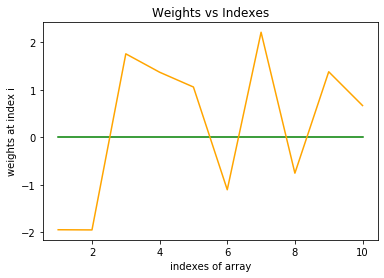

[1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0
 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1
 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1
 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0
 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 

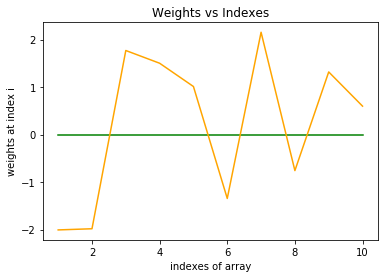

[1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0
 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1
 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0
 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 

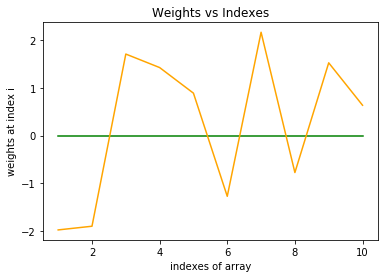

[1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0
 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0
 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 

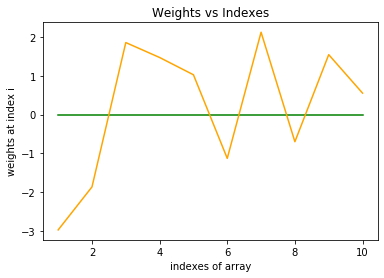

[1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0
 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0
 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0
 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0
 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 

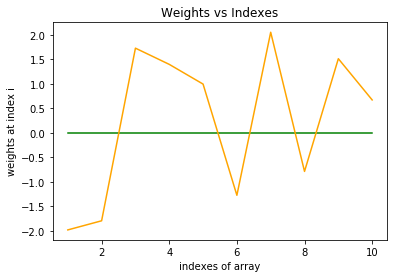

[1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0
 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0
 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0
 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1
 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 0 

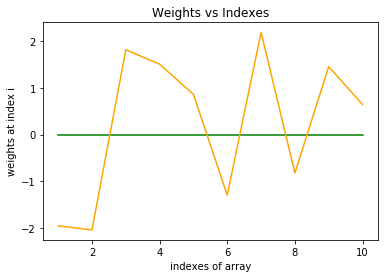

In our case for the best model, we need lowest FPR (Which says that if someone has cancer i detected it as no cancer)
The best model has: accuracy,fpr as (90.61946902654867, 0.11891891891891893)


In [111]:
#Logistic Regression
bestsplit=[]
logop=[]

print("Logistic regression: ")
for i in range(len(split_dataset)):
    testdf=split_dataset[i]
    traindf=[]
    for j in range(len(split_dataset)):
        if i!=j:
            traindf.append(split_dataset[j])
    
    
    temp=[]
    for k in traindf:
        for a in k:
            temp.append(a)
    
    
    traintemp=pd.DataFrame(temp)
    traintemp.columns=["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]

    #print(list(traintemp.columns))
    traindf=traintemp
    
    
    testtemp=pd.DataFrame(testdf)
    testtemp.columns=["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]
    testdf=traintemp   
    
    #Output column of the training dataset (train_df)
    ytrain = traindf[["Class"]]
    #input columns of the training dataset (train_df)
    xtrain = traindf[["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"]]

    #output column of the testing dataset (test_df)
    ytest = testdf[["Class"]]
    #input columns of the the testing dataset (test_df)
    xtest = testdf[["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"]]

    #Converting the datatype of all the input columns of training data to 'int' data type
    xtrain_norm = xtrain.astype('int')
    #Normalising the input data
    xtrain_norm = normalize(xtrain_norm)

    #Converting the datatype of all the output columns of training data to 'int' data type
    ytrain_norm = ytrain.astype('int')
    #normalising the output data
    ytrain_norm = normalize(ytrain_norm)

    #Converting the datatype of all the input columns of testing data to 'int' data type
    xtest_norm = xtest.astype('int')
    xtest_norm = normalize(xtest_norm)

    #Converting the datatype of all the output columns of testing data to 'int' data type
    ytest_norm = ytest.astype('int')
    ytest_norm = normalize(ytest_norm)
    
    b_val = np.matrix(np.zeros(xtrain_norm.shape[1]))
    #print(b_val)
    b_val,iterations = grad_desc(xtrain_norm,ytrain_norm,b_val)

    
    
    
    predict = pred_values(b_val,xtest_norm)
    a=ytest_norm.values.tolist()
    actual=[]
    for j in a:
        actual.append(j[0])
#     print("accuracy of  ",end=" ")
#     print(i,end=" ")
#     print("is: ",end=" ")
    x,fpr_logregr=myaccuracy(predict,actual)
    logop.append(x)
    print("accuracy for ",i,"is: ",x)
    weights=np.array(b_val)[0].tolist()
    #print(len(weights))
    #print("# of weights",len(weights))
    #print(b_val)
    #test_inp = normalize(test_inp)
    indexes=list(range(1,11))
    plt.plot(indexes, initial, color='g')
    plt.plot(indexes, weights, color='orange')
    plt.xlabel('indexes of array')
    plt.ylabel('weights at index i')
    plt.title('Weights vs Indexes')
    plt.show()
    bestsplit.append(x)

z=list(zip(bestsplit,fpr_logregr))
print("In our case for the best model, we need lowest FPR (Which says that if someone has cancer i detected it as no cancer)")
z=sorted(z,key=lambda x:(x[1],-x[0]))
print("The best model has: accuracy,fpr as",z[0])
# print("The best (split,accuracy) is: ",ans)
#print(ans)
    

In [57]:
#KNN with euclidian distances
knnop=[]
from math import sqrt
def euclidian(x,y):
    ans=0
    for i in range(len(x)):
        ans+=(x[i]-y[i])**2
    return sqrt(ans)
    

def KNN(xtrain,ytrain,xtest,ytest):
    n=len(xtrain)
    #print("n is: ",n)
    '''Heuristically, k=sqrt(n) is best for k'''
    k=int(sqrt(n))
    if k%2==0:
        k+=1
    #print("k is: ",k)
    answer=[]
    for test_index in range(len(xtest)):
        curr_result=[]
        test=xtest[test_index]
        for train_index in range(len(xtrain)):
            train=xtrain[train_index]
            d=euclidian(train,test)
            curr_result.append((train_index,d))
        curr_result=sorted(curr_result,key=lambda x:x[1])
        topk=curr_result[:23]
        indexes=[x[0] for x in topk]
        #print("Indexes: ",indexes)
        #print("TOPK: ",topk,len(topk))
        label=[]
        for i in indexes:
            label.append(ytrain[i][-1])
        m=max(label,key=label.count)
        answer.append(m)
    predicted=answer
    yt=[]
    for i in ytest:
        yt.append(i[0])
    #print(predicted)
    acc,fpr_acc=myaccuracy(predicted,yt)
    knnop.append(acc)
    print("Accuracy is: ",acc)
    print()
    


            
            
    
    
    

In [58]:
#KNN model
print("KNN model with euclidian distance")
from math import sqrt
bestsplit=[]
for i in range(len(split_dataset)):
    testdf=split_dataset[i]
    traindf=[]
    for j in range(len(split_dataset)):
        if i!=j:
            traindf.append(split_dataset[j])
    
    
    temp=[]
    for k in traindf:
        for a in k:
            temp.append(a)
    
    
    traintemp=pd.DataFrame(temp)
    traintemp.columns=["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]

    #print(list(traintemp.columns))
    traindf=traintemp
    
    
    testtemp=pd.DataFrame(testdf)
    testtemp.columns=["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]
    testdf=traintemp   
    
    #Output column of the training dataset (train_df)
    ytrain = traindf[["Class"]]
    #input columns of the training dataset (train_df)
    xtrain = traindf[["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"]]

    #output column of the testing dataset (test_df)
    ytest = testdf[["Class"]]
    #input columns of the the testing dataset (test_df)
    xtest = testdf[["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"]]

    #Converting the datatype of all the input columns of training data to 'int' data type
    xtrain_norm = xtrain.astype('int')
    #Normalising the input data
    xtrain_norm = normalize(xtrain_norm)

    #Converting the datatype of all the output columns of training data to 'int' data type
    ytrain_norm = ytrain.astype('int')
    #normalising the output data
    ytrain_norm = normalize(ytrain_norm)

    #Converting the datatype of all the input columns of testing data to 'int' data type
    xtest_norm = xtest.astype('int')
    xtest_norm = normalize(xtest_norm)

    #Converting the datatype of all the output columns of testing data to 'int' data type
    ytest_norm = ytest.astype('int')
    ytest_norm = normalize(ytest_norm)
    
    '''In KNN, finding the value of k is not easy. A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. Data scientists usually choose as an odd number if the number of classes is 2 and another simple approach to select k is set k=sqrt(n).'''
#     n=len(xtrain_norm)
#     print("n is: ",n)
#     k=int(sqrt(n))
#     if k%2==0:
#         k+=1
#     print("k is: ",k)
    #print("Starting: ")
    print(i+1,"iteration: ")
    xtrain=xtrain_norm.values.tolist()
    ytrain=ytrain_norm.values.tolist()
    xtest=xtest_norm.values.tolist()
    ytest=ytest_norm.values.tolist()
    #print("K")
    KNN(xtrain,ytrain,xtest,ytest)

# print(knnop,fpr_knn)
# z=list(zip(knnop,fpr_knn))
# print("z is: ",z)
# z=sorted(z,key=lambda x:(x[1],-x[0]))
# print("The best model has: accuracy,fpr as",z[0])
    
    
    

# best=sorted(bestsplit,key=lambda x:-x[1])
# ans=best[0]

# print("The best (split,accuracy) is: ",ans)
# #print(ans)


    



KNN model with euclidian distance
1 iteration: 
Confusion matrix: 
	 1 	 0
1  	190	7
0  	12	356
False positive rate:  0.01928374655647383
Accuracy is:  96.63716814159292

2 iteration: 
Confusion matrix: 
	 1 	 0
1  	181	7
0  	13	364
False positive rate:  0.018867924528301886
Accuracy is:  96.46017699115043

3 iteration: 
Confusion matrix: 
	 1 	 0
1  	187	8
0  	11	359
False positive rate:  0.021798365122615803
Accuracy is:  96.63716814159292

4 iteration: 
Confusion matrix: 
	 1 	 0
1  	181	6
0  	11	367
False positive rate:  0.0160857908847185
Accuracy is:  96.99115044247787

5 iteration: 
Confusion matrix: 
	 1 	 0
1  	188	9
0  	11	357
False positive rate:  0.02459016393442623
Accuracy is:  96.46017699115043

6 iteration: 
Confusion matrix: 
	 1 	 0
1  	184	7
0  	11	363
False positive rate:  0.01891891891891892
Accuracy is:  96.8141592920354



In [60]:
#KNN with manhattan/city-block distances

from math import sqrt
def manhattan(x,y):
    ans=0
    for i in range(len(x)):
        ans+=abs(x[i]-y[i])
    return ans
    

def KNN(xtrain,ytrain,xtest,ytest):
    n=len(xtrain)
    #print("n is: ",n)
    '''Heuristically, k=sqrt(n) is best for k'''
    k=int(sqrt(n))
    if k%2==0:
        k+=1
    #print("k is: ",k)
    answer=[]
    for test_index in range(len(xtest)):
        curr_result=[]
        test=xtest[test_index]
        for train_index in range(len(xtrain)):
            train=xtrain[train_index]
            d=manhattan(train,test)
            curr_result.append((train_index,d))
        curr_result=sorted(curr_result,key=lambda x:x[1])
        topk=curr_result[:23]
        indexes=[x[0] for x in topk]
        #print("Indexes: ",indexes)
        #print("TOPK: ",topk,len(topk))
        label=[]
        for i in indexes:
            label.append(ytrain[i][-1])
        m=max(label,key=label.count)
        answer.append(m)
    predicted=answer
    yt=[]
    for i in ytest:
        yt.append(i[0])
    #print(predicted)
    acc,fpr_knn_man=myaccuracy(predicted,yt)
    print("Accuracy is: ",acc)
    print()
    
            
            
    
    
    


In [61]:
#KNN model with manhattan distances
print("KNN model with manhattan distance")
from math import sqrt
bestsplit=[]
for i in range(len(split_dataset)):
    testdf=split_dataset[i]
    traindf=[]
    for j in range(len(split_dataset)):
        if i!=j:
            traindf.append(split_dataset[j])
    
    
    temp=[]
    for k in traindf:
        for a in k:
            temp.append(a)
    
    
    traintemp=pd.DataFrame(temp)
    traintemp.columns=["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]

    #print(list(traintemp.columns))
    traindf=traintemp
    
    
    testtemp=pd.DataFrame(testdf)
    testtemp.columns=["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]
    testdf=traintemp   
    
    #Output column of the training dataset (train_df)
    ytrain = traindf[["Class"]]
    #input columns of the training dataset (train_df)
    xtrain = traindf[["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"]]

    #output column of the testing dataset (test_df)
    ytest = testdf[["Class"]]
    #input columns of the the testing dataset (test_df)
    xtest = testdf[["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"]]

    #Converting the datatype of all the input columns of training data to 'int' data type
    xtrain_norm = xtrain.astype('int')
    #Normalising the input data
    xtrain_norm = normalize(xtrain_norm)

    #Converting the datatype of all the output columns of training data to 'int' data type
    ytrain_norm = ytrain.astype('int')
    #normalising the output data
    ytrain_norm = normalize(ytrain_norm)

    #Converting the datatype of all the input columns of testing data to 'int' data type
    xtest_norm = xtest.astype('int')
    xtest_norm = normalize(xtest_norm)

    #Converting the datatype of all the output columns of testing data to 'int' data type
    ytest_norm = ytest.astype('int')
    ytest_norm = normalize(ytest_norm)
    
    '''In KNN, finding the value of k is not easy. A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. Data scientists usually choose as an odd number if the number of classes is 2 and another simple approach to select k is set k=sqrt(n).'''
#     n=len(xtrain_norm)
#     print("n is: ",n)
#     k=int(sqrt(n))
#     if k%2==0:
#         k+=1
#     print("k is: ",k)
    #print("Starting: ")
    print(i+1,"iteration: ")
    xtrain=xtrain_norm.values.tolist()
    ytrain=ytrain_norm.values.tolist()
    xtest=xtest_norm.values.tolist()
    ytest=ytest_norm.values.tolist()
    #print("K")
    KNN(xtrain,ytrain,xtest,ytest)
    
    

# best=sorted(bestsplit,key=lambda x:-x[1])
# ans=best[0]

# print("The best (split,accuracy) is: ",ans)
# #print(ans)


    



KNN model with manhattan distance
1 iteration: 
Confusion matrix: 
	 1 	 0
1  	190	7
0  	12	356
False positive rate:  0.01928374655647383
Accuracy is:  96.63716814159292

2 iteration: 
Confusion matrix: 
	 1 	 0
1  	181	7
0  	13	364
False positive rate:  0.018867924528301886
Accuracy is:  96.46017699115043

3 iteration: 
Confusion matrix: 
	 1 	 0
1  	188	8
0  	10	359
False positive rate:  0.021798365122615803
Accuracy is:  96.8141592920354

4 iteration: 
Confusion matrix: 
	 1 	 0
1  	181	6
0  	11	367
False positive rate:  0.0160857908847185
Accuracy is:  96.99115044247787

5 iteration: 
Confusion matrix: 
	 1 	 0
1  	188	9
0  	11	357
False positive rate:  0.02459016393442623
Accuracy is:  96.46017699115043

6 iteration: 
Confusion matrix: 
	 1 	 0
1  	183	7
0  	12	363
False positive rate:  0.01891891891891892
Accuracy is:  96.63716814159292



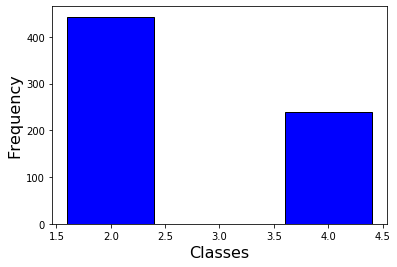

In [24]:
#Some visualizations:
# Bar plots for output class:
import matplotlib.pyplot as plt
import numpy as np
output_class=set(df["Class"].value_counts())
output_list=df["Class"].values.tolist()
# print(output_list)
twos=output_list.count(2)
fours=output_list.count(4)
classes=[2,4]
counts=[twos,fours]
# print(twos,fours)
plt.bar(classes,counts,color='blue',edgecolor='black')
plt.xlabel('Classes', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

# We observe that one of the class has higher frequency than the other and so if we dont have a simple model without any training, we would give out class 2 as output

In [25]:
# print(logop,knnop)

[90.61946902654867, 90.61946902654867, 90.08849557522124, 93.80530973451327, 91.32743362831859, 90.4424778761062] [96.63716814159292, 96.46017699115043, 96.63716814159292, 96.99115044247787, 96.46017699115043, 96.8141592920354]


Text(0.5, 1.0, 'Features vs Values')

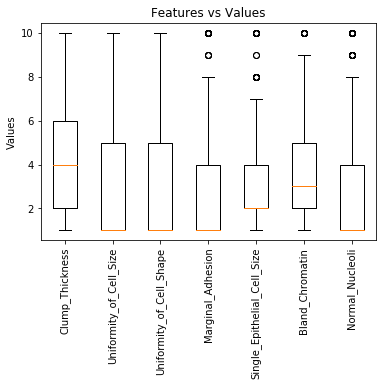

In [29]:
#This contains comparitive box plots of the data
s="Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"
plt.boxplot((df['Clump_Thickness'],df['Uniformity_of_Cell_Size'],df['Uniformity_of_Cell_Shape'],df['Marginal_Adhesion'],df['Single_Epithelial_Cell_Size'],df['Bland_Chromatin'],df['Normal_Nucleoli']))
l=["Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bland_Chromatin","Normal_Nucleoli","Mitoses"]
x_axis=range(1,8)
plt.xticks(x_axis,l)
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.title("Features vs Values")
#plt.boxplot((df['Clump_Thickness'],df['Uniformity_of_Cell_Size'],df['Uniformity_of_Cell_Shape'],df['Marginal_Adhesion'],df['Single_Epithelial_Cell_Size'],df['Bare_Nuclei'],df['Bland_Chromatin'],df['Normal_Nucleoli'],df['Mitoses']))

In [ ]:
#Decison trees

In [151]:
def unique_vals(rows,col):#takes rows and a particular column and outputs the unique values in the column
    l=[]
    for row in rows:
        l.append(row[col])
    return set(l)
    
    
    #returns unique values for a particular column

In [152]:
unique_vals(train_df.values,1)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [153]:
def class_counts(rows):#takes input as a number of rows and outputs the counts of all unique values of the label of those particular
    counts={}#rows.This will be used later to calculate the probability in calculatiing entropy.
    for row in rows:
        label=row[-1]
        if label in counts:
            counts[row[-1]]+=1
        else:
            counts[row[-1]]=1
    return counts

In [154]:
class_counts(train_df.values)[2]

346

In [155]:
class question:# this takes a particular column and a value which u want to check for each row read further codes to understand 
    def __init__(self,column,value):
        self.column=column
        self.value=value
    def match(self,example):
        val=example[self.column]
        if(val==self.value):
            return True
        else:
            return False

In [156]:
q=question(1,3)
values=train_df.values
q.match(values[0])

False

In [157]:
def partition(rows,ques):# this takes a number of rows and ques object and checks each row with that particular question
    true_rows, false_rows=[], []#if that row matches then it is appended to true rows else appended to false rows
    for row in rows:
        if ques.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows,false_rows

In [158]:
import math
def impurity(rows):
    impurit=0
    counts=class_counts(rows)
    for label in counts:
        prob=counts[label]/len(rows)
        impurit=impurit-prob*math.log(prob,2)
    return impurit

In [159]:
print(train_df.values)
impurity(train_df.values)

[[1002945 5 4 ... 2 1 2]
 [1016277 6 8 ... 7 1 2]
 [1017023 4 1 ... 1 1 2]
 ...
 [841769 2 1 ... 1 1 2]
 [888820 5 10 ... 10 2 4]
 [897471 4 8 ... 6 1 4]]


0.9477890004120656

In [160]:
df.shape

(682, 11)

In [161]:
def split(rows):
    best_gain=0
    best_feature=None
    entropy_system=impurity(rows)
    n_features=10
    gain=entropy_system
    for col in range(1,n_features):
        l=[]
        for row in rows:
            l.append(row[col])
        unique=set(l)#unique values is that column
        for val in unique:
            ques=question(col,val)
            true_rows, false_rows=partition(rows,ques)
            if(len(true_rows)==0 and len(false_rows)==0):
                continue
            gain=gain-(l.count(val)/len(rows))*impurity(true_rows)
            #gain=info_gain(true_rows,false_rows,entropy_system)
        if(gain>=best_gain):
            best_gain=gain
            best_feature=ques
    return best_gain,best_feature
        
        
        
    

In [162]:
best_gain,best_feature=split(train_df.values)

In [163]:
class leaf:
    def __init__(self,rows):
        count=class_counts(rows)
        if(2 in count and 4 in count):
            if(count[2]>count[4]):
                self.predictions=2
            else:
                self.predictions=4
        elif(2 in count):
            self.predictions=2
        else:
            self.predictions=4

In [164]:
class decision_node:
    def __init__(self,question,true_branch,false_branch):
        self.question=question
        #self.branch=branch
        self.true_branch=true_branch
        self.false_branch=false_branch

In [165]:
def build_tree(rows):
    gain, best_feature=split(rows)
    if gain==0:
        return leaf(rows)
    true_rows, false_rows=partition(rows, best_feature)
    true_branch = build_tree(true_rows)
    false_branch = build_tree(false_rows)
    return decision_node(best_feature, true_branch, false_branch)

In [166]:
my_tree = build_tree(train_df.values)

In [167]:
def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [168]:
def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [169]:
# classify(train_df.values[7], my_tree)

In [170]:
correct=0
incorrect=0
for row in test_df.values:
    if(row[-1]==classify(row, my_tree)):
        correct=correct+1
    else:
        incorrect+=1
print(correct/(incorrect+correct))

0.8823529411764706


In [171]:

# def DT(testdf,ytest,my_tree):
#     classification=[]
#     for row in testdf.values:
#         c=classify(row,my_tree)
#         classification.append(c)
#     #print(classification)
#     actual_dt=[]
#     predicted_dt=classification
#     for i in ytest.values:
#         x=i[0]
#         actual_dt.append(x)

#     #print(len(predicted_dt)==len(actual_dt))
#     #print(len(predicted_dt),len(actual_dt))
        
        
    
    
    

In [188]:
dtop=[]
from math import sqrt
bestsplit=[]
for i in range(len(split_dataset)):
    testdf=split_dataset[i]
    traindf=[]
    for j in range(len(split_dataset)):
        if i!=j:
            traindf.append(split_dataset[j])
    
    
    temp=[]
    for k in traindf:
        for a in k:
            temp.append(a)
    
    
    traintemp=pd.DataFrame(temp)
    traintemp.columns=["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]

    #print(list(traintemp.columns))
    traindf=traintemp
    
    
    testtemp=pd.DataFrame(testdf)
    testtemp.columns=["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]
    testdf=traintemp   
    
    #Output column of the training dataset (train_df)
    ytrain = traindf[["Class"]]
    #input columns of the training dataset (train_df)
    xtrain = traindf[["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"]]

    #output column of the testing dataset (test_df)
    ytest = testdf[["Class"]]
    #input columns of the the testing dataset (test_df)
    xtest = testdf[["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"]]

    #Converting the datatype of all the input columns of training data to 'int' data type
    xtrain_norm = xtrain.astype('int')
    #Normalising the input data
    xtrain_norm = normalize(xtrain_norm)

    #Converting the datatype of all the output columns of training data to 'int' data type
    ytrain_norm = ytrain.astype('int')
    #normalising the output data
    ytrain_norm = normalize(ytrain_norm)

    #Converting the datatype of all the input columns of testing data to 'int' data type
    xtest_norm = xtest.astype('int')
    xtest_norm = normalize(xtest_norm)

    #Converting the datatype of all the output columns of testing data to 'int' data type
    ytest_norm = ytest.astype('int')
    ytest_norm = normalize(ytest_norm)
    
    '''In KNN, finding the value of k is not easy. A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. Data scientists usually choose as an odd number if the number of classes is 2 and another simple approach to select k is set k=sqrt(n).'''
#     n=len(xtrain_norm)
#     print("n is: ",n)
#     k=int(sqrt(n))
#     if k%2==0:
#         k+=1
#     print("k is: ",k)
    #print("Starting: ")
    print(i+1,"iteration: ")
    xtrain=xtrain_norm.values.tolist()
    ytrain=ytrain_norm.values.tolist()
    xtest=xtest_norm.values.tolist()
    ytest=ytest_norm.values.tolist()
    
    best_gain,best_feature=split(traindf.values)
    my_tree = build_tree(traindf.values)
    correct=0
    incorrect=0
    tp=0
    fp=0
    tn=0
    fn=0
    for row in test_df.values:
        pred=classify(row,my_tree)
        act=row[-1]
        pred=int(pred)
        act=int(act)
        if pred==2:
            pred=0
        if pred==4:
            pred=1
        if act==2:
            act=0
        if act==4:
            act=1
            
            
        if pred== 0 and act==0:
            tn+=1
        elif pred==0 and act==1:
            fn+=1
        elif pred==1 and act==0:
            fp+=1
        elif pred==1 and act==1:
            tp+=1
    ac=(tp+tn)/(tp+tn+fp+fn)
    dtop.append(ac*100)
    print("Confusion matrix: ")
    print("\t 1 \t 0")
    print("1  ",tp,fp,sep="\t")
    print("0  ",fn,tn,sep="\t")
    fpr=fp/(fp+tn)
    print("False positive rate: ",fpr)
    #print("\n")
    print("accuracy for ",i+1," iteration is: ",ac*100)
    print()
    

    

# best=sorted(bestsplit,key=lambda x:-x[1])
# ans=best[0]

# print("The best (split,accuracy) is: ",ans)
# #print(ans)


    


    
    
    

1 iteration: 
Confusion matrix: 
	 1 	 0
1  	28	5
0  	11	92
False positive rate:  0.05154639175257732
accuracy for  1  iteration is:  88.23529411764706

2 iteration: 
Confusion matrix: 
	 1 	 0
1  	28	5
0  	11	92
False positive rate:  0.05154639175257732
accuracy for  2  iteration is:  88.23529411764706

3 iteration: 
Confusion matrix: 
	 1 	 0
1  	28	5
0  	11	92
False positive rate:  0.05154639175257732
accuracy for  3  iteration is:  88.23529411764706

4 iteration: 
Confusion matrix: 
	 1 	 0
1  	29	5
0  	10	92
False positive rate:  0.05154639175257732
accuracy for  4  iteration is:  88.97058823529412

5 iteration: 
Confusion matrix: 
	 1 	 0
1  	28	5
0  	11	92
False positive rate:  0.05154639175257732
accuracy for  5  iteration is:  88.23529411764706

6 iteration: 
Confusion matrix: 
	 1 	 0
1  	28	5
0  	11	92
False positive rate:  0.05154639175257732
accuracy for  6  iteration is:  88.23529411764706



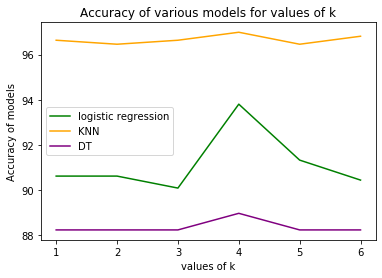

In [189]:
#Comparison:
# print(logop)
k=list(range(1,7))
plt.plot(k, logop, color='g',label="logistic regression")
plt.plot(k, knnop, color='orange',label="KNN")
plt.plot(k, dtop, color='purple',label="DT")
plt.xlabel('values of k')
plt.ylabel('Accuracy of models')
plt.title('Accuracy of various models for values of k')
plt.legend()
plt.show()

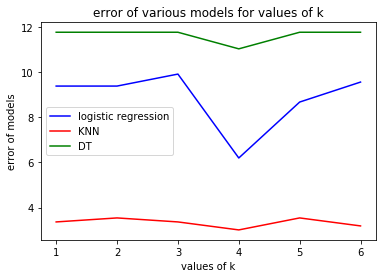

In [191]:
errorlog=[]
errorknn=[]
errordt=[]
for i in logop:
    x=100.0-i
    errorlog.append(x)

for i in knnop:
    x=100.0-i
    errorknn.append(x)

for i in dtop:
    x=100.0-i
    errordt.append(x)

plt.plot(k, errorlog, color='blue',label="logistic regression")
plt.plot(k, errorknn, color='red',label="KNN")
plt.plot(k, errordt, color='green',label="DT")
plt.xlabel('values of k')
plt.ylabel('error of models')
plt.title('error of various models for values of k')
plt.legend()
plt.show()